<a href="https://colab.research.google.com/github/hash2403/python/blob/main/Floyd_warshall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # for creating the numpy arrays
import matplotlib.pyplot as plt # module for plotting/ drawing stuff
import networkx as nx #plot the graphs

In [ ]:
# Take an adj. matrix as an input and returns the same graph with alphabets as nodes.
def generateGraph(Graph):
  G = nx.Graph()
  n = len(Graph)

  #iterating the whole graph
  for i in range(n): #rows
    for j in range(n): #columns
      if(Graph[i][j]): #if the distance between the two nodes are non-zero
        G.add_edge(chr(i + 65),chr(j + 65),weight  = Graph[i][j])
  return G


def drawGraph(Graph,title=""):

  G = generateGraph(Graph)

  # setting figure length (25 * 25)
  plt.figure(figsize=(25,25), facecolor="w", frameon=False)


  # makes the graph a bit uniform!
  pos = nx.spring_layout(G)

  #plots the graph

  #nodes
  nx.draw_networkx_nodes(G, pos, node_size=500,node_color="#F9B5D0")

  # edges
  nx.draw_networkx_edges(G, pos, edgelist=G.edges(data=True), width=6,edge_color="#453C67")


  # node labels/weights
  nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")

  #we are giving edge weights to the words
  edge_labels = nx.get_edge_attributes(G, "weight")

  #
  nx.draw_networkx_edge_labels(G, pos, edge_labels)


  #no grid
  plt.axis("off")

  #makes the plot very much smaller
  plt.tight_layout()

  #giving title to the graph
  plt.title(title)
  plt.show()

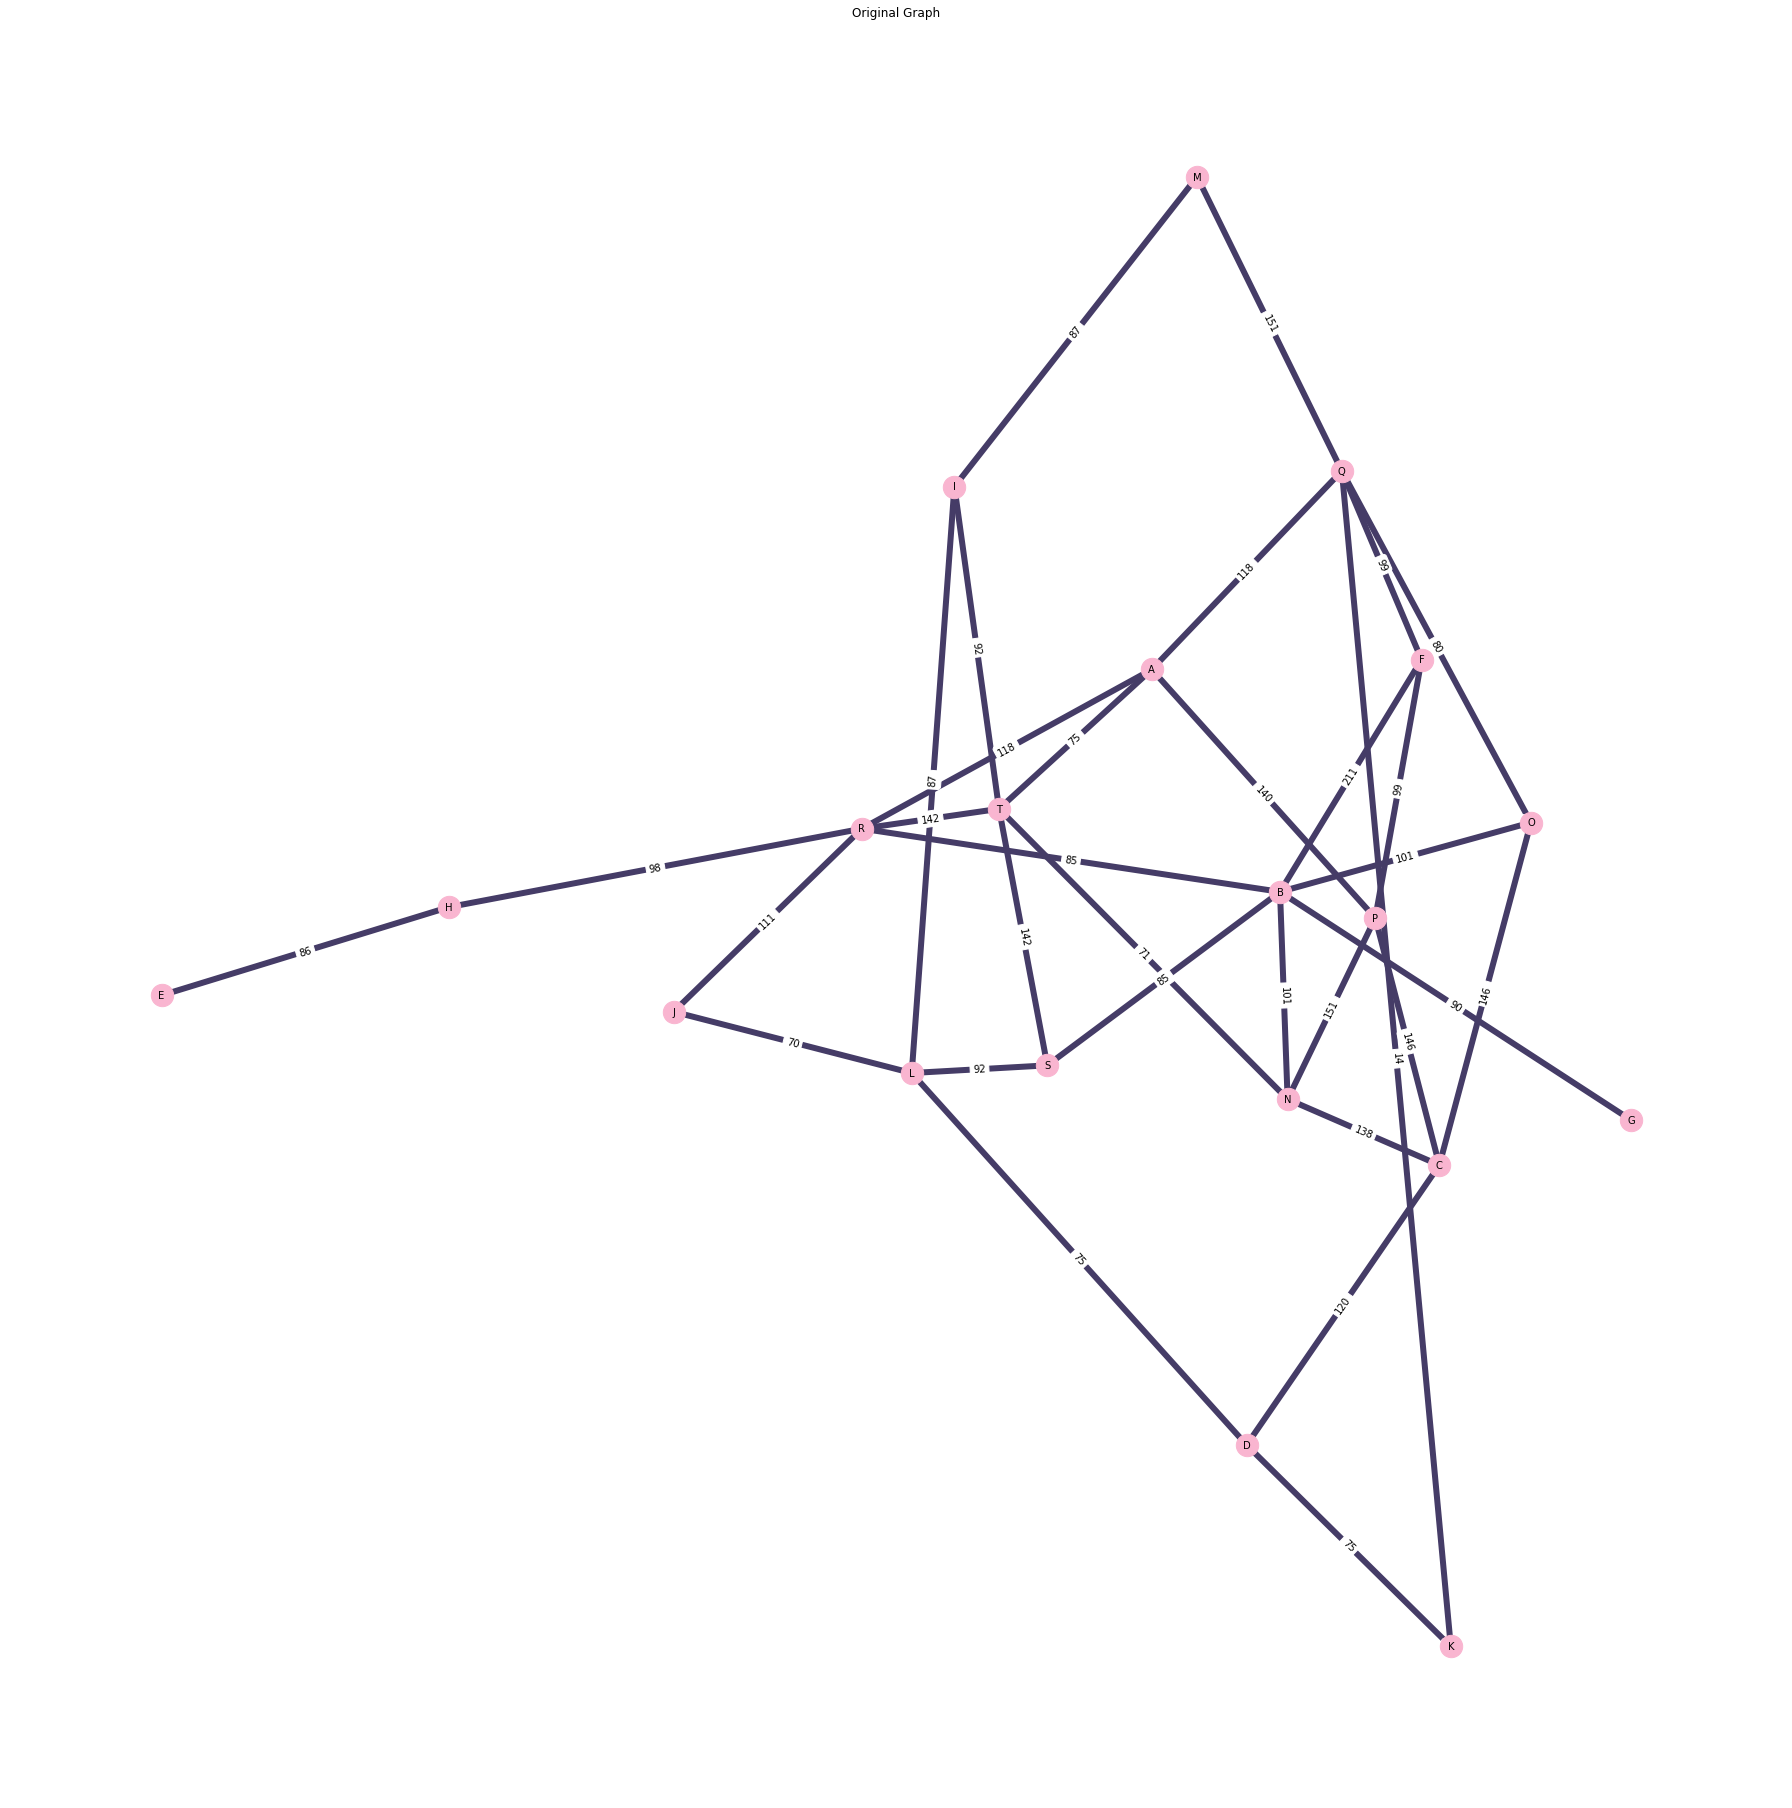

In [ ]:
# starting point of the code
G = [[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,140,118,0,0,75],[0,0,0,0,0,211,90,0,0,0,0,0,0,0,101,0,0,0,85,0,0],[0,0,0,120,0,0,0,0,0,0,0,0,0,0,138,146,0,0,0,0,0],[0,0,120,0,0,0,0,0,0,0,0,75,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,86,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,211,0,0,0,0,0,0,0,0,0,0,0,0,0,0,99,0,0,0,0],[0,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,87,0,0,0,0,0,0,92,0],[0,0,0,0,0,0,0,0,0,0,0,70,0,0,0,0,0,111,0,0,0],[0,0,0,75,0,0,0,0,0,0,70,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,87,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,151,0,0,0,71],[0,101,138,0,0,0,0,0,0,0,0,0,0,0,0,97,0,0,0,0,0],[0,0,146,0,0,0,0,0,0,0,0,0,0,0,97,0,80,0,0,0,0],[140,0,0,0,0,99,0,0,0,0,0,0,0,151,0,80,0,0,0,0,0],[118,0,0,0,0,0,0,0,0,0,14,0,0,0,0,0,0,0,0,0,0],[0,85,0,0,0,0,0,98,0,0,0,0,0,0,0,0,0,0,0,142,0],[0,0,0,0,0,0,0,0,0,0,0,92,0,0,0,0,0,0,0,142,0,0],[75,0,0,0,0,0,0,0,0,0,0,0,0,71,0,0,0,0,0,0,0]]
#we draw graph using networkx module and plot the graph
drawGraph(G,"Original Graph")

In [ ]:
def printMatrix(matrix,title=""):
  print(title)
  print("-"*len(title))
  for i in matrix:
    print(*i)
  print()


Pre-processed Matrix
--------------------
0 inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf 140 118 inf inf 75
inf 0 inf inf inf 211 90 inf inf inf inf inf inf inf 101 inf inf inf 85 inf 0
inf inf 0 120 inf inf inf inf inf inf inf inf inf inf 138 146 inf inf inf inf 0
inf inf 120 0 inf inf inf inf inf inf inf 75 inf inf inf inf inf inf inf inf 0
inf inf inf inf 0 inf inf 86 inf inf inf inf inf inf inf inf inf inf inf inf 0
inf 211 inf inf inf 0 inf inf inf inf inf inf inf inf inf inf 99 inf inf inf 0
inf 90 inf inf inf inf 0 inf inf inf inf inf inf inf inf inf inf inf inf inf 0
inf inf inf inf 86 inf inf 0 inf inf inf inf inf inf inf inf inf inf inf inf 0
inf inf inf inf inf inf inf inf 0 inf inf inf 87 inf inf inf inf inf inf 92 0
inf inf inf inf inf inf inf inf inf 0 inf 70 inf inf inf inf inf 111 inf inf 0
inf inf inf 75 inf inf inf inf inf inf 0 inf inf inf inf inf inf inf inf inf 0
inf inf inf inf inf inf inf inf 87 inf inf 0 inf inf inf inf inf inf inf inf 0
inf inf i

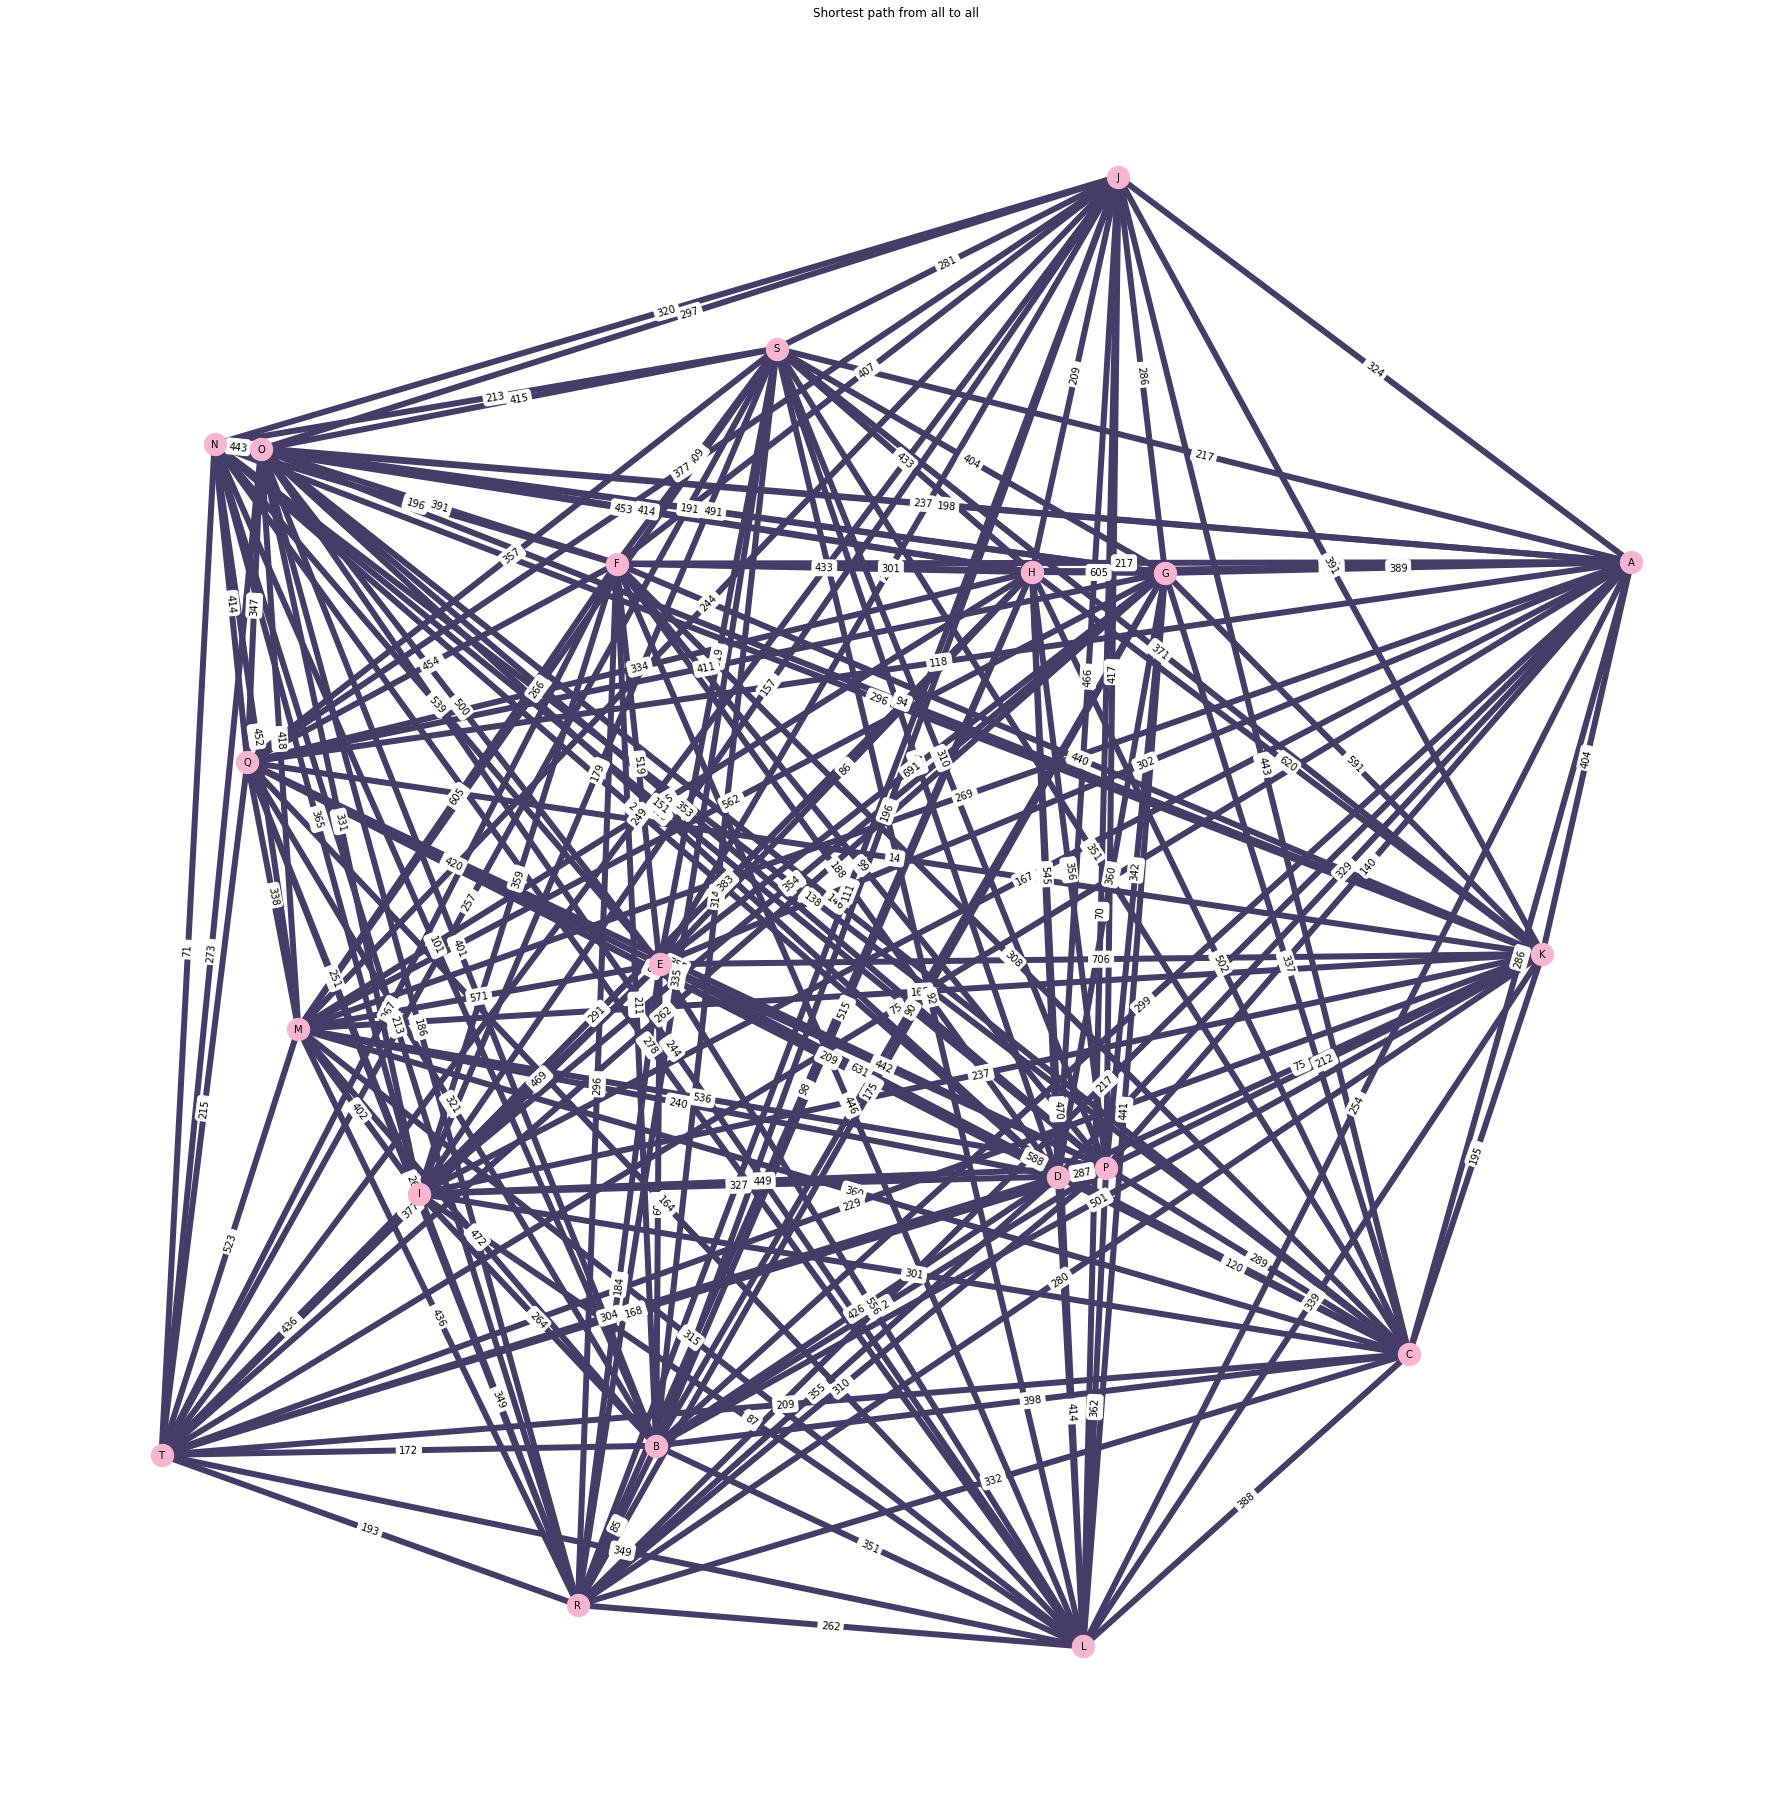

In [ ]:
def floydWarshall(G):
    n = len(G)

    #pre-processing graph -> making the zero weighted edges to infinity
    for i in range(n):
      for j in range(n):
        #diagonal stuff -> self edges
        if(i == j):
          G[i][j] = 0
        else:
          if G[i][j] == 0:
            G[i][j] = float("inf")
    printMatrix(G,"Pre-processed Matrix")
    #copy of a matrix
    distanceMatrix = G.copy()

    #floyd warshall algorithm
    for r in range(n):
        for p in range(n):
            for q in range(n):
                distanceMatrix[p][q] = min(distanceMatrix[p][q], distanceMatrix[p][r] + distanceMatrix[r][q])
        printMatrix(distanceMatrix,f"A-{r+1}")

    # Printing out the matrix
    res = distanceMatrix.copy()
    for i in range(len(res)):
      for j in range(len(res)):
        if res[i][j] == float("inf"):
          res[i][j] = None

    # returing the result of all to all shortest graph and title of graph!
    return res,"Shortest path from all to all"

# plotting the all to all shortest vertex graph!
drawGraph(*floydWarshall(G))

In [ ]:
#input of starting node of graph
source = input("Enter the source from where you wanted to start? ")

#input of ending node of graph
destination = input("Enter the source from where you wanted to end? ")

# generating the graph which we feed to A* algo
G_ = generateGraph(G)

#a star algorithm directly from networkx
optimalPath = nx.astar.astar_path(G_,source,destination)

#optimal path of A* algorithm!
optimalPathLength = nx.astar.astar_path_length(G_,source,destination)

#new line -> makes the output a bit pretty!
print()

#printing the path
print(f"Optimal Path from {source} to {destination} is '''{' -> '.join(optimalPath)}''' ")

#printing the optimal distance
print(f"Optimal Path-length from {source} to {destination} is {optimalPathLength}")

Enter the source from where you wanted to start? A
Enter the source from where you wanted to end? F

Optimal Path from A to F is '''A -> F''' 
Optimal Path-length from A to F is 217
